<a href="https://colab.research.google.com/github/Bhavin52/Case_Study/blob/main/Decision_Tree_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [35]:
f_check = pd.read_csv('/content/Fraud_check.csv',index_col=0)

In [36]:
f_check.head()

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
Undergrad,,,,,
NO,Single,68833,50047,10,YES
YES,Divorced,33700,134075,18,YES
NO,Married,36925,160205,30,YES
YES,Single,50190,193264,15,YES
NO,Married,81002,27533,28,NO


In [37]:
f_check.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, NO to NO
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Marital.Status   600 non-null    object
 1   Taxable.Income   600 non-null    int64 
 2   City.Population  600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    object
dtypes: int64(3), object(2)
memory usage: 28.1+ KB


In [38]:
f_check["TaxInc"] = pd.cut(f_check["Taxable.Income"], bins = [10000,30000,99620], labels = ["Risky", "Good"])
f_check

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,TaxInc
Undergrad,,,,,,
NO,Single,68833,50047,10,YES,Good
YES,Divorced,33700,134075,18,YES,Good
NO,Married,36925,160205,30,YES,Good
YES,Single,50190,193264,15,YES,Good
NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...
YES,Divorced,76340,39492,7,YES,Good
YES,Divorced,69967,55369,2,YES,Good
NO,Divorced,47334,154058,0,YES,Good


In [39]:
label_encoder = preprocessing.LabelEncoder()
f_check['TaxInc']= label_encoder.fit_transform(f_check['TaxInc']) 
f_check['Marital.Status']= label_encoder.fit_transform(f_check['Marital.Status'])
f_check['Urban']= label_encoder.fit_transform(f_check['Urban'])

In [40]:
f_check.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, NO to NO
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Marital.Status   600 non-null    int64
 1   Taxable.Income   600 non-null    int64
 2   City.Population  600 non-null    int64
 3   Work.Experience  600 non-null    int64
 4   Urban            600 non-null    int64
 5   TaxInc           600 non-null    int64
dtypes: int64(6)
memory usage: 32.8+ KB


In [41]:
x=f_check.iloc[:,0:5]
y=f_check['TaxInc']

In [42]:
f_check['TaxInc'].unique()

array([0, 1])

In [43]:
f_check.TaxInc.value_counts()

0    476
1    124
Name: TaxInc, dtype: int64

In [44]:
colnames = list(f_check.columns)
colnames

['Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban',
 'TaxInc']

In [45]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

Building Decision Tree Classifier using Entropy Criteria

In [46]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

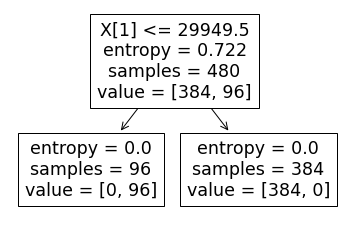

In [47]:
tree.plot_tree(model);

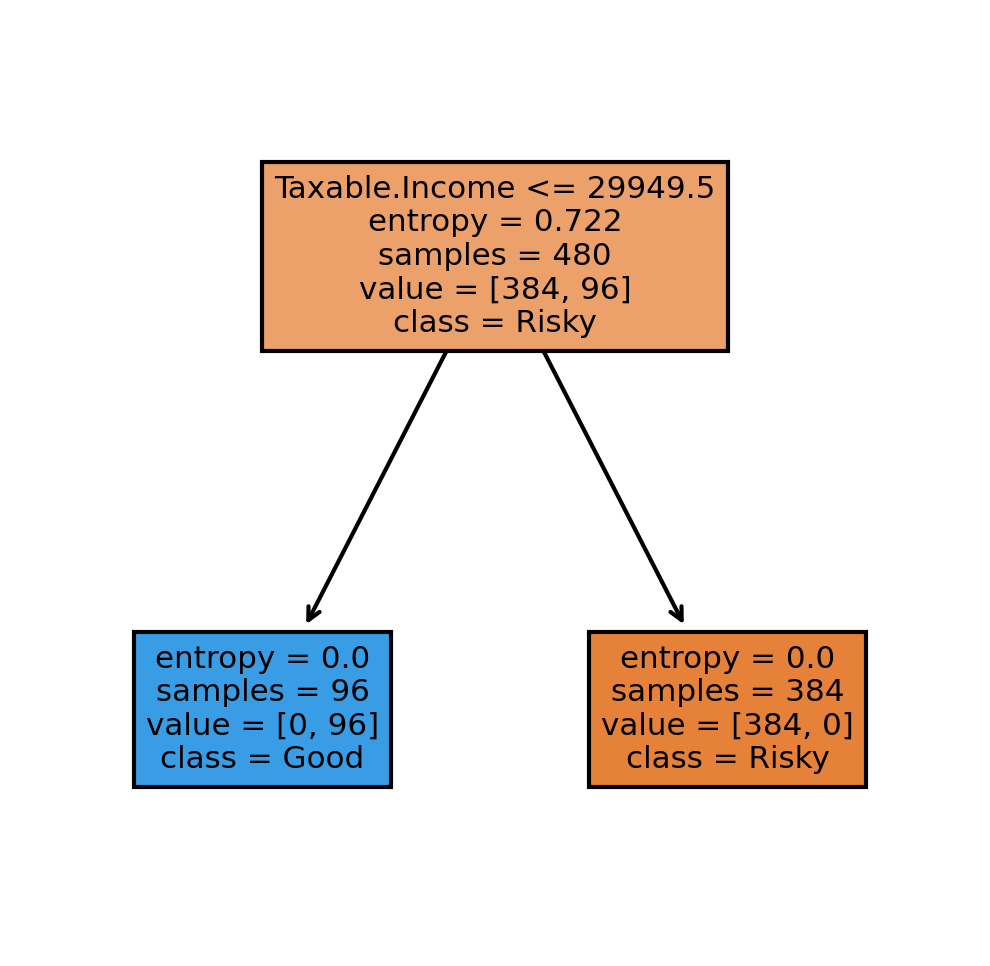

In [48]:
fn=['Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban',
 'TaxInc']
cn=["Risky", "Good"]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [49]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    92
1    28
dtype: int64

In [50]:
preds

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [51]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
TaxInc,,
0,92,0
1,0,28


In [52]:
# Accuracy 
np.mean(preds==y_test)

1.0

Building Decision Tree Classifier (CART) using Gini Criteria